In [132]:
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import matplotlib.pyplot as plt
import matplotlib as mpl

In [163]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "15556010",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [164]:
con = PostgresConnection().getConnection()

successfully connected to database


In [174]:
cur5 = con.cursor()
select_query5 = '''SELECT  s.year,s.month, p.item_name , SUM(t.total_price) 
                     FROM ecomdb_star_schema.fact_table t 
                  	 JOIN ecomdb_star_schema.time_dim s on s.time_key = t.time_key 
					 JOIN ecomdb_star_schema.item_dim p  on p.item_key = t.item_key 
		        	 GROUP BY CUBE(s.month, s.year, p.item_name) 
                     ORDER BY p.item_name ASC;'''
cur5.execute(select_query5)
records5 = cur5.fetchall()
records5

query5 = pd.DataFrame(list(records5), columns=['year','month','item_name','SUM'])
query5

,year,month,item_name,SUM
0,2020.0,NaN,100% Juice Box Variety 6.75 oz,51660.00
1,2021.0,NaN,100% Juice Box Variety 6.75 oz,1875.00
2,2020.0,1.0,100% Juice Box Variety 6.75 oz,4020.00
3,2017.0,10.0,100% Juice Box Variety 6.75 oz,4515.00
4,2016.0,9.0,100% Juice Box Variety 6.75 oz,3525.00
...,...,...,...,...
27555,2018.0,3.0,None,1252282.50
27556,2015.0,12.0,None,1279379.50
27557,2016.0,6.0,None,1193281.75
27558,2020.0,8.0,None,1282673.25


In [175]:
df =  query5[ (query5['month'].isna() == True) & (query5['item_name'].isna() == False) & (query5['year'].isna() == False)  ]
df 

,year,month,item_name,SUM
0,2020.0,NaN,100% Juice Box Variety 6.75 oz,51660.0
1,2021.0,NaN,100% Juice Box Variety 6.75 oz,1875.0
10,2018.0,NaN,100% Juice Box Variety 6.75 oz,51045.0
15,2016.0,NaN,100% Juice Box Variety 6.75 oz,51135.0
31,2014.0,NaN,100% Juice Box Variety 6.75 oz,49365.0
...,...,...,...,...
27385,2019.0,NaN,Zoo Animal Cookies/Crackers,44912.0
27410,2018.0,NaN,Zoo Animal Cookies/Crackers,43638.0
27425,2014.0,NaN,Zoo Animal Cookies/Crackers,43358.0
27426,2016.0,NaN,Zoo Animal Cookies/Crackers,46914.0


In [176]:
df = df [ ( df['item_name'] == 'Zoo Animal Cookies/Crackers' )]
df

,year,month,item_name,SUM
27359,2021.0,NaN,Zoo Animal Cookies/Crackers,2898.0
27369,2015.0,NaN,Zoo Animal Cookies/Crackers,42000.0
27373,2017.0,NaN,Zoo Animal Cookies/Crackers,43456.0
27385,2019.0,NaN,Zoo Animal Cookies/Crackers,44912.0
27410,2018.0,NaN,Zoo Animal Cookies/Crackers,43638.0
27425,2014.0,NaN,Zoo Animal Cookies/Crackers,43358.0
27426,2016.0,NaN,Zoo Animal Cookies/Crackers,46914.0
27430,2020.0,NaN,Zoo Animal Cookies/Crackers,43498.0


In [178]:
df = df.sort_values(by=['year'])
df = df.drop(columns=['month'])
df

,year,item_name,SUM
27425,2014.0,Zoo Animal Cookies/Crackers,43358.0
27369,2015.0,Zoo Animal Cookies/Crackers,42000.0
27426,2016.0,Zoo Animal Cookies/Crackers,46914.0
27373,2017.0,Zoo Animal Cookies/Crackers,43456.0
27410,2018.0,Zoo Animal Cookies/Crackers,43638.0
27385,2019.0,Zoo Animal Cookies/Crackers,44912.0
27430,2020.0,Zoo Animal Cookies/Crackers,43498.0
27359,2021.0,Zoo Animal Cookies/Crackers,2898.0


In [88]:
    print(df.head(5))
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Columns--------------")
    print(df.columns)
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())
    print("-----Shape Of Data-------------")
    print(df.shape)

         year      SUM
27425  2014.0  43358.0
27369  2015.0  42000.0
27426  2016.0  46914.0
27373  2017.0  43456.0
27410  2018.0  43638.0
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 27425 to 27359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    8 non-null      float64
 1   SUM     8 non-null      float64
dtypes: float64(2)
memory usage: 192.0 bytes
None
----------Describe-------------
             year           SUM
count     8.00000      8.000000
mean   2017.50000  38834.250000
std       2.44949  14591.136779
min    2014.00000   2898.000000
25%    2015.75000  43018.500000
50%    2017.50000  43477.000000
75%    2019.25000  43956.500000
max    2021.00000  46914.000000
----------Columns--------------
Index(['year', 'SUM'], dtype='object')
----------Data Types-----------
year    float64
SUM     float64
dtype: object
-------Missing Values----------
year    0
SUM     0
dty

In [68]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\vintern\hda-tech-learning\notebook\env\scripts\python.exe -m pip install --upgrade pip' command.


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [179]:
df1 = df[['year', 'SUM']]
df1

,year,SUM
27425,2014.0,43358.0
27369,2015.0,42000.0
27426,2016.0,46914.0
27373,2017.0,43456.0
27410,2018.0,43638.0
27385,2019.0,44912.0
27430,2020.0,43498.0
27359,2021.0,2898.0


In [118]:
train = df1
test = df1

In [119]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size= .3,random_state = 2)

In [120]:
reg = LinearRegression()

In [121]:
reg.fit(x_train,y_train)

LinearRegression()

In [141]:
predict1 = reg.predict(x_test)

In [184]:
df4= pd.DataFrame(predict1, columns=['year','total_sell'])
df4 = df4.sort_values(by=['year'])
df4

,year,total_sell
1,2015.0,42000.0
0,2018.0,43638.0
2,2020.0,43498.0


In [146]:
reg.score(x_test,y_test)

1.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


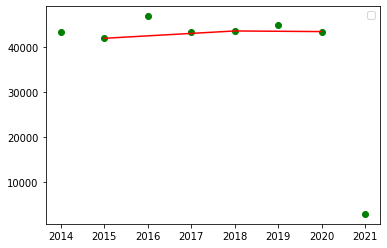

In [185]:
plt.plot(df4['year'],df4['total_sell'],color='red')
plt.scatter(df1['year'],df1['SUM'], c = 'green')
plt.legend()
plt.show()